<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T11%20-%203%20-%20Reconocimiento%20de%20texto%20escrito-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clonamos el repositorio para obtener los dataSet

In [ ]:
!git clone https://github.com/joanby/python-ml-course.git

# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Test it
!ls '/content/drive/My Drive' 

In [ ]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

In [ ]:
%tensorflow_version 1.x

# El dataset de MNIST

In [2]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
len(mnist.train.images)

55000

In [5]:
len(mnist.test.images)

10000

In [6]:
im_temp = mnist.train.images[0]

In [7]:
from skimage import io
import numpy as np

/Users/JuanGabriel/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


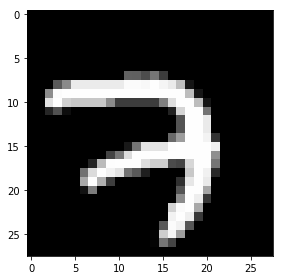

In [8]:
io.imshow(np.reshape(im_temp, (28,28)))

In [9]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

# Una red neuronal con Tensor Flow - v1
* Las imágenes de entrenamiento de MNIST viven en un espacio vectorial de dimensión 784.
* El dataset se puede pensar como 55000 filas y 784 columnas.
* Cada dato del datset es un número real entre 0 y 1.

y = softmax(W * x + b)

In [67]:
dim_input = 784
n_categories = 10

In [68]:
x = tf.placeholder(tf.float32, [None, dim_input])

In [69]:
W = tf.Variable(tf.zeros([dim_input,n_categories])) 
b = tf.Variable(tf.zeros([n_categories]))

In [70]:
softmax_args = tf.matmul(x,W) + b
y_hat = tf.nn.softmax(softmax_args)

#### Entrenando la red neuronal
* Loss / Cost <- objetivo minimizar las pérdidas

In [71]:
from IPython.display import display, Math, Latex

In [73]:
display(Math(r"H_{y}(\hat{y}) = -\sum_{i} y_i log(\hat{y_i})"))

<IPython.core.display.Math object>

In [74]:
y_ = tf.placeholder(tf.float32, [None, 10])

In [76]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_hat), reduction_indices=[1]))

In [ ]:
#tf.nn.softmax_cross_entropy_with_logits(softmax_args, y_)

In [77]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [78]:
session = tf.InteractiveSession()

In [79]:
tf.global_variables_initializer().run()

In [95]:
for _ in range(10000):
    batch_x, batch_y = mnist.train.next_batch(150)
    session.run(train_step, feed_dict={x:batch_x, y_: batch_y})

#### Evaluando la red neuronal



In [92]:
correct_predictions = tf.equal(tf.argmax(y_hat, 1), tf.argmax(y_,1))

In [93]:
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

In [96]:
print(session.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9254
